# Tutorial 6
Optimizing refractive surfaces.

Here, we optimize two even asphere surfaces on `metabox` and verify on Zemax later.  
We use BK7 as the refractive medium between them.

Loss: 3.559502: 100%|██████████| 100/100 [02:41<00:00,  1.62s/it]


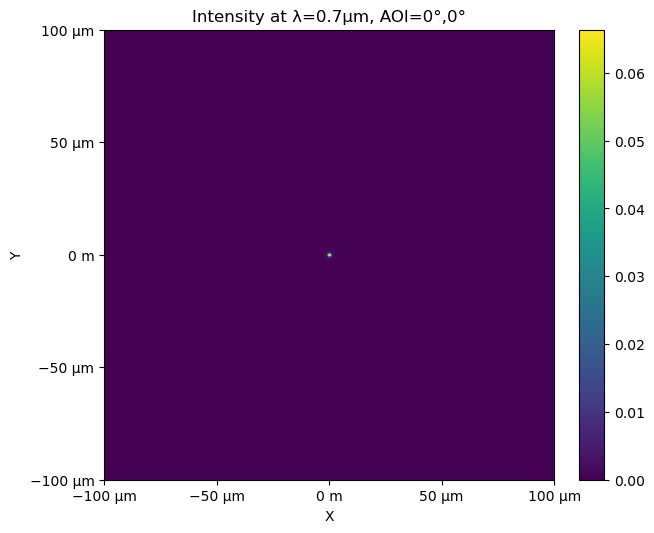

In [ ]:
from metabox import assembly
import tensorflow as tf
import tqdm


incidence = assembly.Incidence(
    wavelength=[700e-9],
    theta=[0],
    phi=[0],
)

# The first surface is 200um in diameter, 100um thick, and has a refractive index of 1.5131.
asph1 = assembly.RefractiveEvenAsphere(
    diameter=0.2e-3,
    refractive_index=1.5131,
    thickness=0.1e-3,
    periodicity=0.5e-6,
    init_coeff=[0, 0],
    thickness_penalty_coeff=1e-3,
)

# The second surface is 200um in diameter, 300um thick, and has a refractive index of 1.0.
asph2 = assembly.RefractiveEvenAsphere(
    diameter=0.2e-3,
    refractive_index=1.0,
    thickness=0.3e-3,
    periodicity=0.5e-6,
    init_coeff=[0, 0],
    thickness_penalty_coeff=1e-3,
)

# Create a lens assembly.
lens_assembly = assembly.LensAssembly(
        surfaces=[asph1, asph2],
        incidence=incidence,   # Define the incidence.
        figure_of_merit=assembly.FigureOfMerit.LOG_STREHL_RATIO, # Define the figure of merit.
)

# We use RMSprop rather than Adam because converges faster in our use case.
# We use LOG_STREHL_RATIO because it scales the solution space to be more uniform.

optimizer = tf.keras.optimizers.RMSprop(learning_rate=1e-1)
optimizer.build(lens_assembly.get_variables())

# Optimize the lens assembly.
history = assembly.optimize_single_lens_assembly(
    lens_assembly, 
    optimizer, 
    n_iter=100,
    verbose=1,
    keep_best=True,
)
lens_assembly.show_psf()

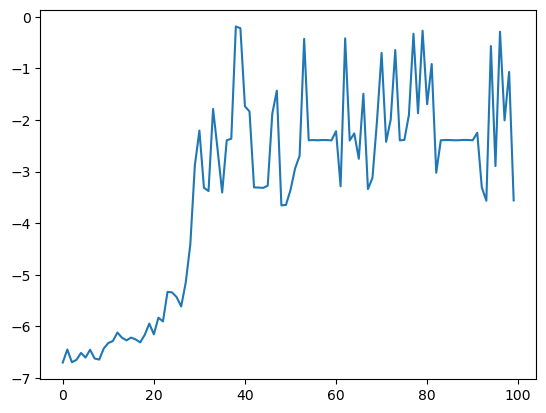

In [2]:
import matplotlib.pyplot as plt
plt.plot(history)

In [5]:
print("First surface coefficients: ", asph1.coeff.numpy())
print("Second surface coefficients: ", asph2.coeff.numpy())

First surface coefficients:  [1.2065572e+00 6.5350602e-04]
Second surface coefficients:  [-1.8727232e+00 -5.4405257e-04]


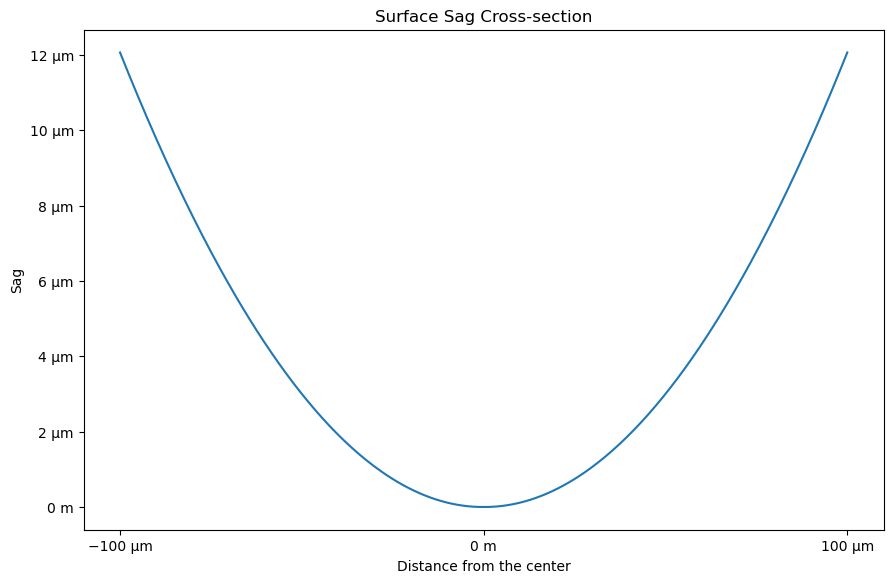

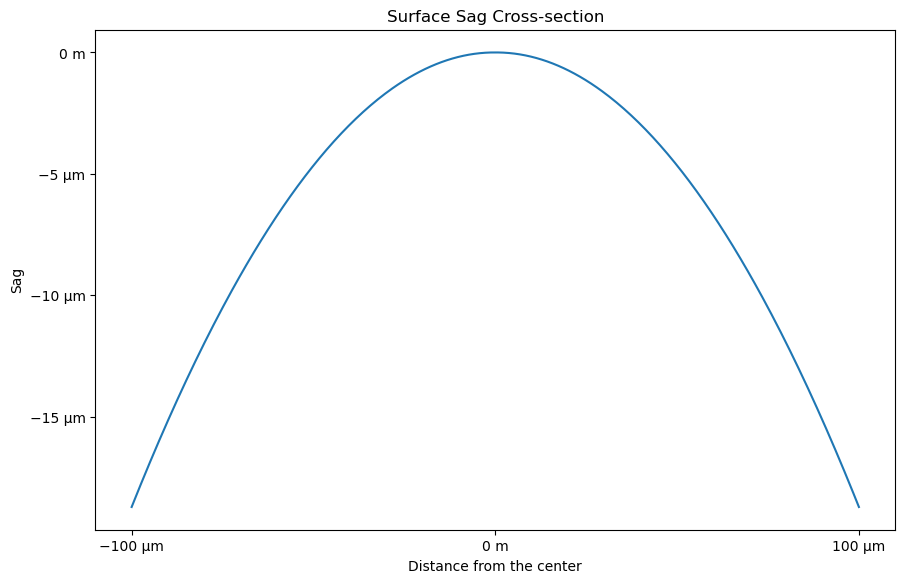

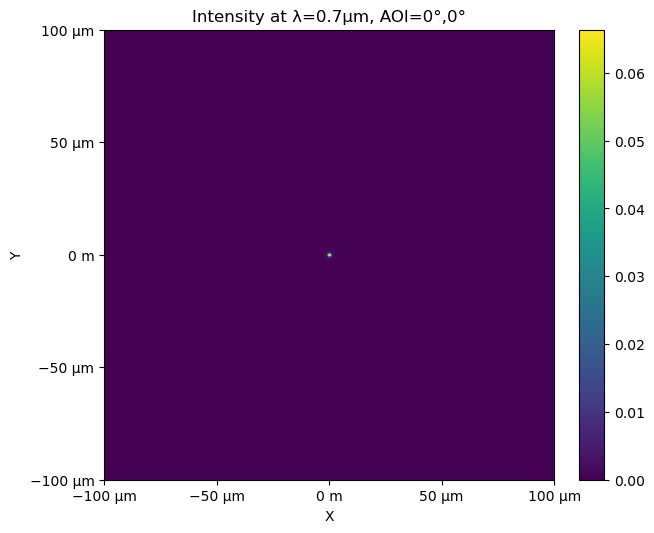

In [6]:

asph1.show_sag()
asph2.show_sag()
lens_assembly.show_psf()

Now we verify the design via Zemax.
We see a diffraction limited system! The diffraction limited MTF is in black which coincides with the MTF of our optical system.
![zemax](img/zemax_3.png)